In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

1. Plotting some random values

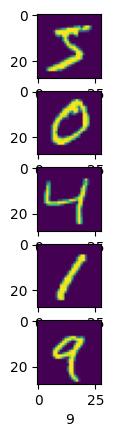

In [8]:
plt_val = 511

for i in range(0, 5):
  plt.subplot(plt_val)
  plt_val += 1
  plt.imshow(x_train[i])
  plt.xlabel(f'{y_train[i]}')

In [5]:
#Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
img_shape = x_train[0].shape
img_shape

(28, 28)

In [23]:
ann_model = Sequential([
    Input(shape=img_shape),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

print(ann_model.summary())
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_model.fit(x_train, y_train, epochs=10)

loss, accuracy = ann_model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}, Loss: {loss}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8788 - loss: 0.4185
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9685 - loss: 0.1027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9767 - loss: 0.0731
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0510
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9876 - loss: 0.0399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9880 - loss: 0.0355
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0236
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9935 - loss: 0.0196
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9938 - loss: 0.0198
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9947 - loss: 0.0148
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.1205
Accuracy: 0.9767000079154968, Loss: 

In [8]:
cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(kernel_size=3, filters=32, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(kernel_size=3, filters=64, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(cnn_model.summary())

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(x_train, y_train, epochs=10)

loss, accuracy = cnn_model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}, Loss: {loss}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9199 - loss: 0.2613
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9874 - loss: 0.0404
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9913 - loss: 0.0264
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9945 - loss: 0.0182
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9965 - loss: 0.0096
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - accuracy: 0.9976 - loss: 0.0077
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 41ms/step - accuracy: 0.9981 - loss: 0.0056
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 38ms/step - accuracy: 0.9981 - loss: 0.0052
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - accuracy: 0.9982 - loss: 0.0056
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9897 - loss: 0.0363
Accuracy: 0.992500